In [ ]:
"""
Trabajo Grupal: Dado los data sets de Ratings y Movies se pide:

- Armar un sistema de recomendación basado en los históricos de datos de Ratings y Movies cuando los ratings son 
  mayores o iguales a 4.

- En el dataset de ratings tenemos las columnas de userId, movieId, rating, timestamp

- En el dataset de movies tenemos las columnas de movieId, title y genres

Podemos notar que la columna que vincula a ambos dataset son movieId.

Para evitar tener el mismo error con el dataset de Market_Basket_Optimisation en el cual teníamos columnas con valor 
igual a Nan. Podemos resolver este problema usando la biblioteca from mlxtend.preprocessing import TransactionEncoder

from mlxtend.preprocessing import TransactionEncoder

Si obtienen error Module Not Found #pip install mlxtend
"""

: 

In [1]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd

In [2]:
path = 'C:/Users/Millan/Desktop/Programacion/Instituto Data Science/U 07. Reglas de Asociación/Curso Circular Python/Ej Practicos/'
movies = path + 'movies.csv'
ratings = path + 'ratings.csv'

df_movies = pd.read_csv(movies)
df_ratings = pd.read_csv(ratings)

print(df_movies.shape)
print(df_movies.columns)
df_movies.head()

print(df_ratings.shape)
print(df_ratings.columns)
df_ratings.head()



(9742, 3)
Index(['movieId', 'title', 'genres'], dtype='object')
(100836, 4)
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Saco valores unicos de genero de todo el DataSet de df_movies

In [3]:
df_movies['genres'].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

Agrego un gráfico de barras que me muestra el conteo de películas por puntos de rating

<Axes: xlabel='rating', ylabel='count'>

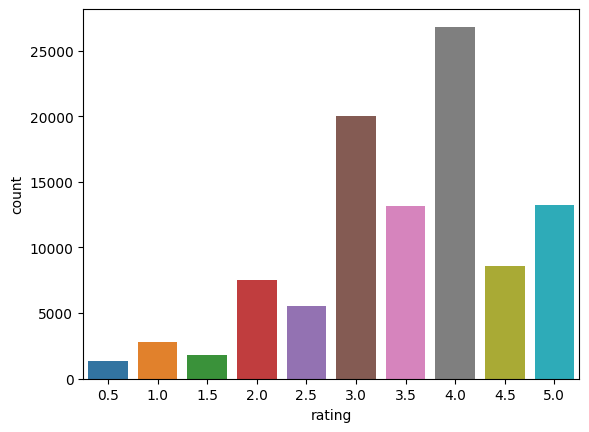

In [4]:
sns.countplot(x = df_ratings['rating'])

Agrego un gráfico de Torta que me muestra las proporciones de los puntos de rating

<Axes: ylabel='count'>

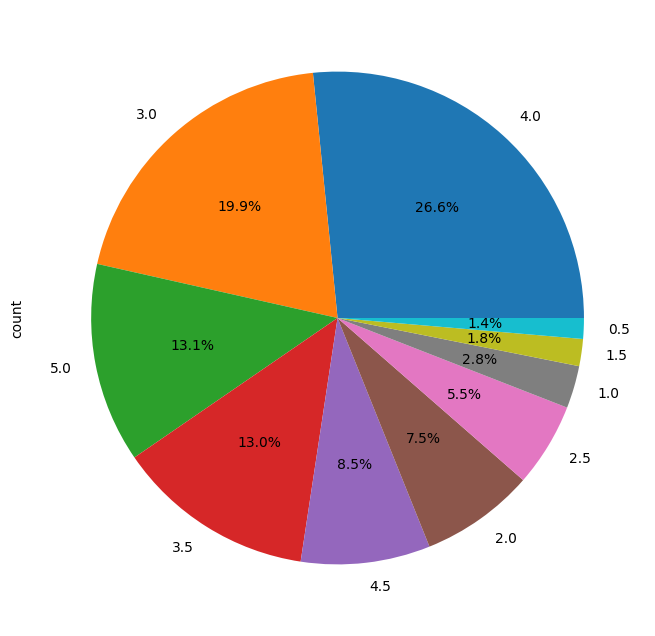

In [5]:
plt.figure(figsize=(10,8))
df_ratings['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False)

A continuacion:

Datos de grupos basados en: Cada usuario vio qué peliculas y cuanto calificó para esas películas. ID de usuario 1 ID de película vista 1, 3, 6, 47, 50 y así sucesivamente y otorgó una calificación individual para cada película.

In [6]:
df_ratings=df_ratings[['userId','movieId','rating']] # Saco Timestamp
ratings = df_ratings.groupby(['userId','movieId']).agg(np.max) # Agrupo los datos por userId y movieId, el agg.(np.max me muestra los ratings de cada usuario individual)
ratings.head() # Me tira los ratings que el Usuario clasifico en cada pelicula


rating
userId movieId        
1      1           4.0
       3           4.0
       6           4.0
       47          5.0
       50          5.0

Cuento los Rankings de las películas

In [7]:
count_ratings = df_ratings.groupby('rating').count() #Cuento desde el df para q me aparezcan tmb los conteos del userId y del movieId
count_ratings

userId  movieId
rating                 
0.5       1370     1370
1.0       2811     2811
1.5       1791     1791
2.0       7551     7551
2.5       5550     5550
3.0      20047    20047
3.5      13136    13136
4.0      26818    26818
4.5       8551     8551
5.0      13211    13211

A Continuación vemos el porcentaje para cada calificación.

calificaciones 5.0 obtuvo 13.1 % calificaciones 4.5 obtuvo 8.5 % calificaciones 4.0 obtuvo 26.6 % calificaciones 3.5 obtuvo 13.0 % calificaciones 3.0 obtuvo 19.9 % calificaciones 2.5 obtuvo 5.5 % calificaciones 2.0 obtuvo 7.5 % calificaciones 1.5 obtuvo 1.8 % calificaciones 1.0 obtuvo 2.8 % calificaciones obtuvo 1.0.5 La calificación más alta es 4.0 y la calificación más baja es 1.4

In [8]:
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)
count_ratings

userId  movieId  perc_total
rating                             
0.5       1370     1370         1.4
1.0       2811     2811         2.8
1.5       1791     1791         1.8
2.0       7551     7551         7.5
2.5       5550     5550         5.5
3.0      20047    20047        19.9
3.5      13136    13136        13.0
4.0      26818    26818        26.6
4.5       8551     8551         8.5
5.0      13211    13211        13.1

Agrego Grafico de torta sobre el vector perc_total


<Axes: ylabel='perc_total'>

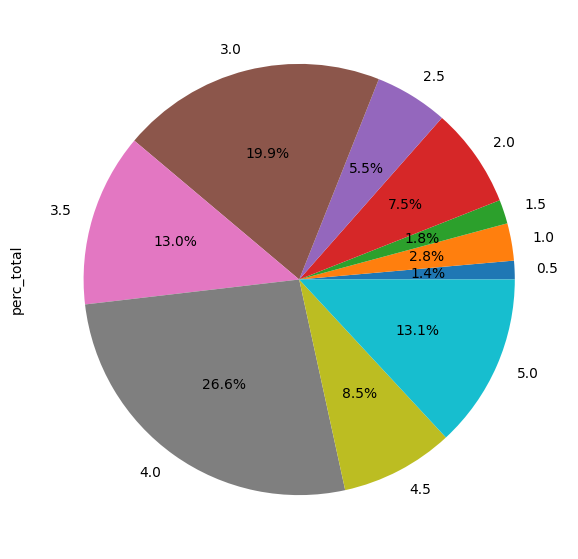

In [21]:
plt.figure(figsize=(7,7))
count_ratings['perc_total'].plot.pie(autopct='%1.1f%%')

Agregamos un grafico de barras

<Axes: xlabel='rating'>

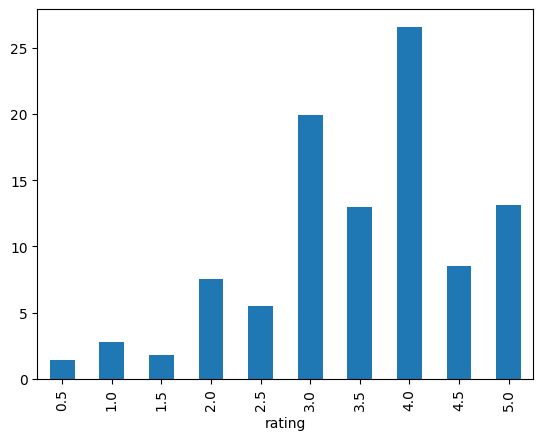

In [29]:
count_ratings['perc_total'].plot.bar()

Separamos los generos en un nuevo dataSet

In [31]:
genres = df_movies['genres']
genres.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

A continuación separamos todos los géneros de películas del conjunto de datos y use la estructura de datos "establecida" para no duplicar géneros en el mismo. 

Si en la columna "|" encuentra, separará los géneros de las películas y eliminará la duplicación en el mismo mediante el uso de la estructura de datos "establecida".

In [34]:
genre_list=" "
for index,row in df_movies.iterrows():
    genre_list+=row.genres+"|"
genre_list_split=genre_list.split("|")
new_list=list(set(genre_list_split))
new_list.remove('')
new_list

['War',
 'Romance',
 'Documentary',
 'Action',
 'Crime',
 'Western',
 'Horror',
 'Drama',
 'Musical',
 'Animation',
 'Comedy',
 'Film-Noir',
 'Mystery',
 'Thriller',
 '(no genres listed)',
 ' Adventure',
 'Fantasy',
 'Adventure',
 'Sci-Fi',
 'IMAX',
 'Children']

Copio el df de movies


In [35]:
m=df_movies.copy()

A continuación lo que quiero hacer es pasar a un valor numérico cada película a que genero pertenece pero en dimensiones separadas

In [36]:
for genre in new_list:
    m[genre]=m.apply(lambda _:int(genre in _.genres),axis=1)
m.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  War  Romance  Documentary  \
0  Adventure|Animation|Children|Comedy|Fantasy    0        0            0   
1                   Adventure|Children|Fantasy    0        0            0   
2                               Comedy|Romance    0        1            0   
3                         Comedy|Drama|Romance    0        1            0   
4                                       Comedy    0        0            0   

   Action  Crime  Western  Horror  ...  Film-Noir  Mystery  Thriller  \
0       0      0        0       0  ...          0        0         0   
1       0      0        0       0  ...          0        0         0   
2       0      0        0       0  ...          0        0         0   
3       0      0        0       0  ...          0        0         0   
4       0      0        0       0  ...          0        0         0   

   (no genres listed)   Adventure  Fantasy  Adventure  Sci-Fi  IMAX  Children  
0                   0           0        1          1       0     0         1  
1                   0           0        1          1       0     0         1  
2                   0           0        0          0       0     0         0  
3                   0           0        0          0       0     0         0  
4                   0           0        0          0       0     0         0  

[5 rows x 24 columns]

Hago un nuevo dataset por el id de cada pelicula con su media correspondiente y su count

In [38]:
avg = pd.DataFrame(df_ratings.groupby('movieId')['rating'].agg(['mean','count']))
avg

mean  count
movieId                 
1        3.920930    215
2        3.431818    110
3        3.259615     52
4        2.357143      7
5        3.071429     49
...           ...    ...
193581   4.000000      1
193583   3.500000      1
193585   3.500000      1
193587   3.500000      1
193609   4.000000      1

[9724 rows x 2 columns]

Agrego el campo movieId

In [39]:
avg['movieId']=avg.index
avg

mean  count  movieId
movieId                          
1        3.920930    215        1
2        3.431818    110        2
3        3.259615     52        3
4        2.357143      7        4
5        3.071429     49        5
...           ...    ...      ...
193581   4.000000      1   193581
193583   3.500000      1   193583
193585   3.500000      1   193585
193587   3.500000      1   193587
193609   4.000000      1   193609

[9724 rows x 3 columns]

En el 70%, la pelicula tiene un recuento de 7

In [40]:
np.percentile(avg['count'],70)


7.0

En el 50%, le pelicula tiene un recuento de 3

In [42]:
np.percentile(avg['count'],50)

3.0

Quiero listar todas las peliculas y guardarlas en una variable idxtitle

In [59]:
idx2title = {int(row['movieId']):row['title']
                for _, row in df_movies.iterrows()}
idx2title

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (a.k.a. 12 Monkeys) (199

Cambio de lugar el movieId y el titulo

In [56]:
titleidx2 = {j:i for i,j in idx2title.items()}
titleidx2

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (a.k.a. 12 Monkeys) (199

De acuerdo con la consigna me tengo que quedar con las peliculas q tengan rating >= 4

In [55]:
highratings=df_ratings[df_ratings.rating>=4] 
highratings

userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100830     610   166528     4.0
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0

[48580 rows x 3 columns]

Anteriormente tuve los códigos de las peliculas con rating >=4, pero tambien necesito los nombres de las películas para poder recomendar al usuario.


In [60]:
itemsets=[[idx2title[mov] for mov in highratings[highratings.userId==user].movieId]
         for user in highratings.userId]
itemsets

[['Toy Story (1995)',
  'Grumpier Old Men (1995)',
  'Heat (1995)',
  'Seven (a.k.a. Se7en) (1995)',
  'Usual Suspects, The (1995)',
  'Bottle Rocket (1996)',
  'Braveheart (1995)',
  'Rob Roy (1995)',
  'Canadian Bacon (1995)',
  'Desperado (1995)',
  'Billy Madison (1995)',
  'Dumb & Dumber (Dumb and Dumber) (1994)',
  'Ed Wood (1994)',
  'Star Wars: Episode IV - A New Hope (1977)',
  'Tommy Boy (1995)',
  'Clear and Present Danger (1994)',
  'Forrest Gump (1994)',
  'Jungle Book, The (1994)',
  'Mask, The (1994)',
  'Dazed and Confused (1993)',
  'Fugitive, The (1993)',
  'Jurassic Park (1993)',
  "Schindler's List (1993)",
  'So I Married an Axe Murderer (1993)',
  'Three Musketeers, The (1993)',
  'Tombstone (1993)',
  'Dances with Wolves (1990)',
  'Batman (1989)',
  'Silence of the Lambs, The (1991)',
  'Pinocchio (1940)',
  'Fargo (1996)',
  'James and the Giant Peach (1996)',
  'Rock, The (1996)',
  "She's the One (1996)",
  'Wizard of Oz, The (1939)',
  'Citizen Kane (1941)',

Una vez que tengo los DataSets armados puedo invocar al algoritmo Apriori para el sistema de recomendacion

Lo que quiero hacer a continuación es lo siguiente:
  - Por cada pelicula (Item) quiero poner si el usuario 1....x consumió determenida película...si la vio va a tener un True si no la vió va a tener un False.

Me transforma los items en este caso las películas y en las filas los usuarios
    

In [61]:
te = TransactionEncoder()
tr_ary = te.fit(itemsets).transform(itemsets)
DF = pd.DataFrame(tr_ary,columns=te.columns_)
DF.head()

'71 (2014)  'Hellboy': The Seeds of Creation (2004)  'Salem's Lot (2004)  \
0       False                                    False                False   
1       False                                    False                False   
2       False                                    False                False   
3       False                                    False                False   
4       False                                    False                False   

   'Til There Was You (1997)  'burbs, The (1989)  (500) Days of Summer (2009)  \
0                      False               False                        False   
1                      False               False                        False   
2                      False               False                        False   
3                      False               False                        False   
4                      False               False                        False   

   *batteries not included (1987)  ...And Justice for All (1979)  \
0                           False                          False   
1                           False                          False   
2                           False                          False   
3                           False                          False   
4                           False                          False   

   00 Schneider - Jagd auf Nihil Baxter (1994)  1-900 (06) (1994)  ...  \
0                                        False              False  ...   
1                                        False              False  ...   
2                                        False              False  ...   
3                                        False              False  ...   
4                                        False              False  ...   

   Zombieland (2009)  Zookeeper (2011)  Zoolander (2001)  Zootopia (2016)  \
0              False             False             False            False   
1              False             False             False            False   
2              False             False             False            False   
3              False             False             False            False   
4              False             False             False            False   

   Zulu (1964)  [REC] (2007)  [REC]² (2009)  eXistenZ (1999)  xXx (2002)  \
0        False         False          False            False       False   
1        False         False          False            False       False   
2        False         False          False            False       False   
3        False         False          False            False       False   
4        False         False          False            False       False   

   ¡Three Amigos! (1986)  
0                   True  
1                   True  
2                   True  
3                   True  
4                   True  

[5 rows x 6297 columns]

Con el parámetro use_colnames= True le estoy indicando que tome solamente las columnas que indicó True, es decir, aquellas que el usuario vió

In [62]:
f = apriori(DF,min_support = 0.2, use_colnames=True, max_len = 2)
rules = association_rules(f,metric='lift',min_threshold= 2)
rules.head()

antecedents  \
0                              (Blade Runner (1982))   
1                     (2001: A Space Odyssey (1968))   
2  (Dr. Strangelove or: How I Learned to Stop Wor...   
3                     (2001: A Space Odyssey (1968))   
4                                   (Aladdin (1992))   

                                         consequents  antecedent support  \
0                     (2001: A Space Odyssey (1968))            0.336414   
1                              (Blade Runner (1982))            0.333059   
2                     (2001: A Space Odyssey (1968))            0.319926   
3  (Dr. Strangelove or: How I Learned to Stop Wor...            0.333059   
4                            (Lion King, The (1994))            0.332565   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.333059  0.240243    0.714128  2.144151  0.128197    2.333009   
1            0.336414  0.240243    0.721323  2.144151  0.128197    2.381197   
2            0.333059  0.218979    0.684468  2.055096  0.112425    2.113703   
3            0.319926  0.218979    0.657478  2.055096  0.112425    1.985492   
4            0.331083  0.232462    0.698997  2.111246  0.122355    2.222296   

   zhangs_metric  
0       0.804138  
1       0.800093  
2       0.754925  
3       0.769790  
4       0.788610

Sobre lo anterior, se ha recomendado que la película use el usuario donde 'antecedentes' es la columna de la película y 'consecuencias' es la columna de la película recomendada. 

En la primera fila, si ve la película '(2001:A Space Odyssey(1968))', se le recomendará '(Blade Runner(1982))' para ver más y cuya confianza de la vista es del 72 % aproximadamente. 

La columna lift se usa para decirnos que la probabilidad de ver ambas películas juntas es 2,144151 veces mayor que la probabilidad de ver solo una película. El soporte es la popularidad predeterminada de un artículo. 

En términos matemáticos, el soporte de un artículo no es más que la proporción de transacciones que involucran un artículo al número total de transacciones. support(movie_1)=(Todas las transacciones que involucran movie_1)/(total de transacciones) 

Conviction compara la probabilidad de que X aparezca sin Y si fueran dependientes con la frecuencia real de aparición de X sin Y. 

El umbral en el algoritmo Apriori identifica los conjuntos de elementos que son subconjuntos de al menos ya que cada transacción se ve como un conjunto de elementos.

El leverage calcula la diferencia entre la frecuencia observada de A y C que aparecen juntos y la frecuencia que se esperaría si A y C fueran independientes. Un valor de leverage de 0 indica independencia.